# Short-list promising models  
Notes: 
- If the data is huge, you may want to sample smaller training sets so you can train many different models in a reasonable time (be aware that this penalizes complex models such as large neural nets or Random Forests).  
- Once again, try to automate these steps as much as possible.    

1. Train many quick and dirty models from different categories (e.g., linear, naive, Bayes, SVM, Random Forests, neural net, etc.) using standard parameters.  
2. Measure and compare their performance.  
    - For each model, use N-fold cross-validation and compute the mean and standard deviation of their performance. 
3. Analyze the most significant variables for each algorithm.  
4. Analyze the types of errors the models make.  
    - What data would a human have used to avoid these errors?  
5. Have a quick round of feature selection and engineering.  
6. Have one or two more quick iterations of the five previous steps.  
7. Short-list the top three to five most promising models, preferring models that make different types of errors.  


# Fine-Tune the System  
Notes:  
- You will want to use as much data as possible for this step, especially as you move toward the end of fine-tuning.   
- As always automate what you can.    

1. Fine-tune the hyperparameters using cross-validation.  
    - Treat your data transformation choices as hyperparameters, especially when you are not sure about them (e.g., should I replace missing values with zero or the median value? Or just drop the rows?).  
    - Unless there are very few hyperparamter values to explore, prefer random search over grid search. If training is very long, you may prefer a Bayesian optimization approach (e.g., using a Gaussian process priors, as described by Jasper Snoek, Hugo Larochelle, and Ryan Adams ([https://goo.gl/PEFfGr](https://goo.gl/PEFfGr)))  
2. Try Ensemble methods. Combining your best models will often perform better than running them invdividually.  
3. Once you are confident about your final model, measure its performance on the test set to estimate the generalization error.

> Don't tweak your model after measuring the generalization error: you would just start overfitting the test set.  


In [103]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import pytz

In [131]:
X_train = pd.read_csv('../datasets/scaled_train_test/X_train_standard.csv', delimiter=',')
X_test = pd.read_csv('../datasets/scaled_train_test/X_test_standard.csv', delimiter=',')
y_train = X_train['Value (kWh)']
y_test = X_test['Value (kWh)']
X_train.drop(['Value (kWh)'], axis=1, inplace=True)
X_test.drop(['Value (kWh)'], axis=1, inplace=True)

In [132]:
X_train = X_train[['Global radiation (W/m2)','Air temperature (degC)']]
X_test = X_test[['Global radiation (W/m2)','Air temperature (degC)']]

In [133]:
from sklearn.ensemble import RandomForestRegressor

In [134]:
model = RandomForestRegressor(n_estimators = 5000, max_depth=10, random_state=42,n_jobs=4)

In [135]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=5000, n_jobs=4, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [136]:
print("Fit done")
print("Feature importances: ", model.feature_importances_)

Fit done
Feature importances:  [0.97608272 0.02391728]


([0, 1], <a list of 2 Text xticklabel objects>)

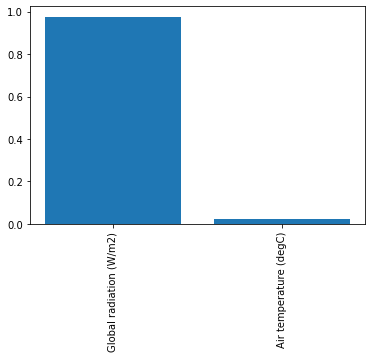

In [137]:
plt.bar(x=X_train.columns,height=model.feature_importances_)
plt.xticks(rotation='vertical')

In [138]:
y_pred = model.predict(X_test)

In [139]:
test = pd.DataFrame(data=y_test.values)
test.columns=['y_test']

In [140]:
test['y_pred'] = y_pred

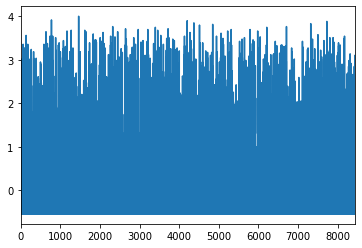

In [141]:
y_test.plot()

In [142]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test['y_test'], test['y_pred'])
print("MSE - ", mse)

MSE -  0.11266408401026604


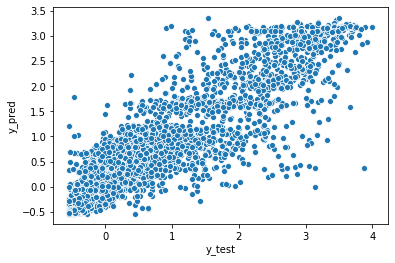

In [143]:
sns.scatterplot(x='y_test', y='y_pred', data=test)

## Results:
Random Forest - n_estimators = 5000, max_depth=10, random_state=42

All variables present:
* standard scaling - MSE = 0.09755
* minmax scaling   - MSE = 0.00446
* unscaled         - MSE = 340.26232

If we remove all variables, but Global radiation and Air temperature:
* standard scaling - MSE = 0.11266
* minmax scaling   - MSE = 0.00515
* unscaled         - MSE = 392.99250

If we remove Global radiation and use calculated theoretical value of Solar Radiation:
* standard scaling - MSE = 
* minmax scaling   - MSE = 
* unscaled         - MSE = 